In [712]:
# import libraries
import pandas as pd
pd.set_option('display.max_colwidth', None) #setting max colwidth to view the entire dataset when using the print() command
import matplotlib.pyplot as plt
import numpy as np

In [713]:
# import the files
data = open("./dataset/breast-cancer.data")
feat = open("./dataset/breast-cancer.names")

data = data.read()
feat = feat.read()

In [714]:
# replace missing dataset attributes to NAN
data = data.replace('?','')

In [715]:
from io import StringIO

In [716]:
# convert data from str to dataframe
data = StringIO(data)
data = pd.read_csv(data, sep=",")

In [717]:
data.columns = ['class', 'age', 'menopause', 'tumour_size', 'inv_nodes', 'node_caps', 'deg_malig', 'breast', 'breast_quad', 'irrad']

In [718]:
data['class'] = data['class'].replace(['no-recurrence-events','recurrence-events'], [0,1])
data['age'] = data['age'].replace(['20-29', '30-39','40-49','50-59','60-69','70-79'],[0,1,2,3,4,5])
data['menopause'] = data['menopause'].replace(['premeno','ge40','lt40'],[0,1,2])
data['tumour_size'] = data['tumour_size'].replace(['0-4','5-9','10-14','15-19','20-24','25-29','30-34','35-39','40-44','45-49','50-54'],[0,1,2,3,4,5,6,7,8,9,10])
data['inv_nodes'] = data['inv_nodes'].replace(['0-2','3-5','6-8','9-11','12-14','15-17','24-26'],[0,1,2,3,4,5,6])
data['node_caps'] = data['node_caps'].replace(['no','yes'],[0,1])
data['breast'] = data['breast'].replace(['left','right'],[0,1])
data['breast_quad'] = data['breast_quad'].replace(['left_low','left_up','right_up','right_low','central'],[0,1,2,3,4])
data['irrad'] = data['irrad'].replace(['no','yes'],[0,1])

In [719]:
# replace missing data 
data['node_caps'] = data['node_caps'].fillna(5)
data['breast_quad'] = data['breast_quad'].fillna(8)

In [720]:
X = data.drop(['class'], axis = 1)
y = data['class']

In [721]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

When developing a machine learning model for prediction of binary non-continuous data in a classification problem, where false negatives are a "MUST NOT", you may want to prioritize recall over precision. In such a scenario, it is better to have a larger test set so that the model's performance can be thoroughly evaluated on unseen data.


Therefore, an 80-20 split might be more appropriate, with 80% of the data being used for training and 20% being used for testing. This will give a better idea of how well the model is able to generalize to new, unseen data, which is crucial for avoiding overfitting.

In [722]:
X_train['size_agg'] = X_train['deg_malig'] + X_train['tumour_size']
X_train['meta'] = X_train['node_caps'] + X_train['menopause']
X_train['breast_tumour'] = X_train['breast_quad'] + X_train['inv_nodes']

X_test['size_agg'] = X_test['deg_malig'] + X_test['tumour_size']
X_test['meta'] = X_test['node_caps'] + X_test['menopause']
X_test['breast_tumour'] = X_test['breast_quad'] + X_test['inv_nodes']

In [723]:
important_features = ['size_agg', 'meta', 'breast_tumour']
X_train = X_train[important_features]
X_test = X_test[important_features]

In [724]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier



from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score, precision_score
from sklearn.metrics import confusion_matrix

from imblearn.over_sampling import RandomOverSampler

from IPython.display import display



ros = RandomOverSampler(random_state=42)

X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

model = RandomForestClassifier()


model.fit(X_resampled, y_resampled)



y_score = model.predict_proba(X_test)[:, 1]




y_pred = model.predict(X_test)





print('Acc:',model.score(X_train, y_train))
print('F1:',f1_score(y_test, y_pred, average='binary'))
print('ROC-AUC:',roc_auc_score(y_test, y_score))
print('Recc:',recall_score(y_test, y_pred))
print('Prec:',precision_score(y_test, y_pred))
print('Conf Mx: \n', confusion_matrix(y_test, y_pred))


Acc: 0.8157894736842105
F1: 0.37500000000000006
ROC-AUC: 0.5904411764705882
Recc: 0.35294117647058826
Prec: 0.4
Conf Mx: 
 [[31  9]
 [11  6]]


<AxesSubplot:>

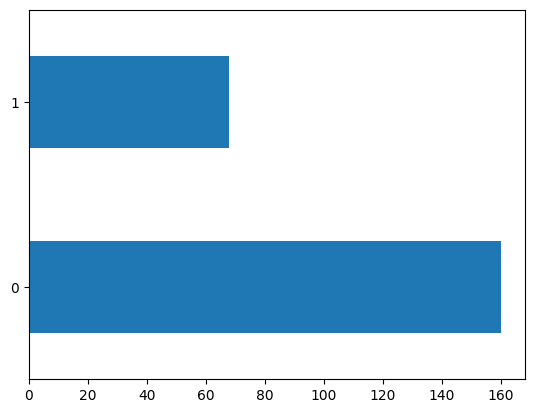

In [725]:
class_ = y_train.value_counts()
class_.plot.barh()

<AxesSubplot:>

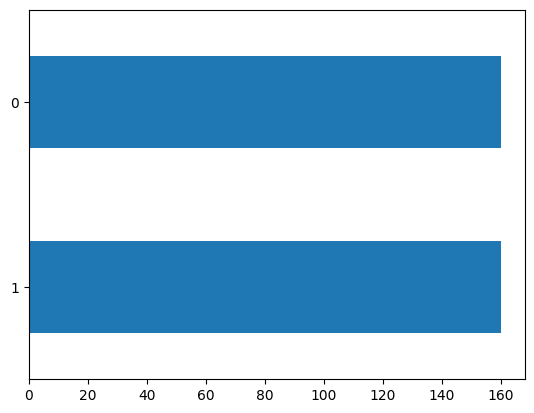

In [726]:
class_ = y_resampled.value_counts()
class_.plot.barh()

<AxesSubplot:>

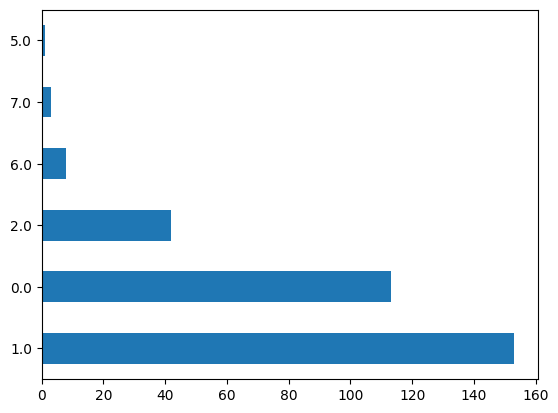

In [727]:
class_ = X_resampled['meta'].value_counts()
class_.plot.barh()

<AxesSubplot:>

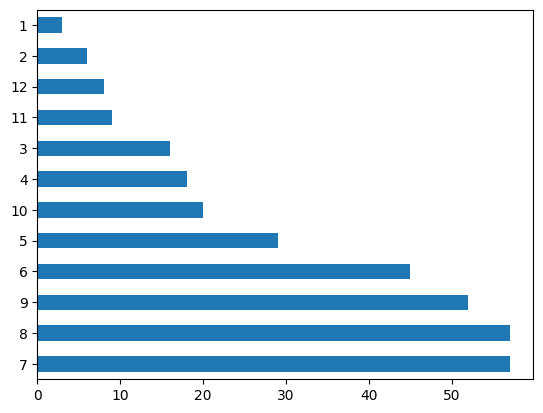

In [728]:
class_ = X_resampled['size_agg'].value_counts()
class_.plot.barh()

([0, 1, 2], [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

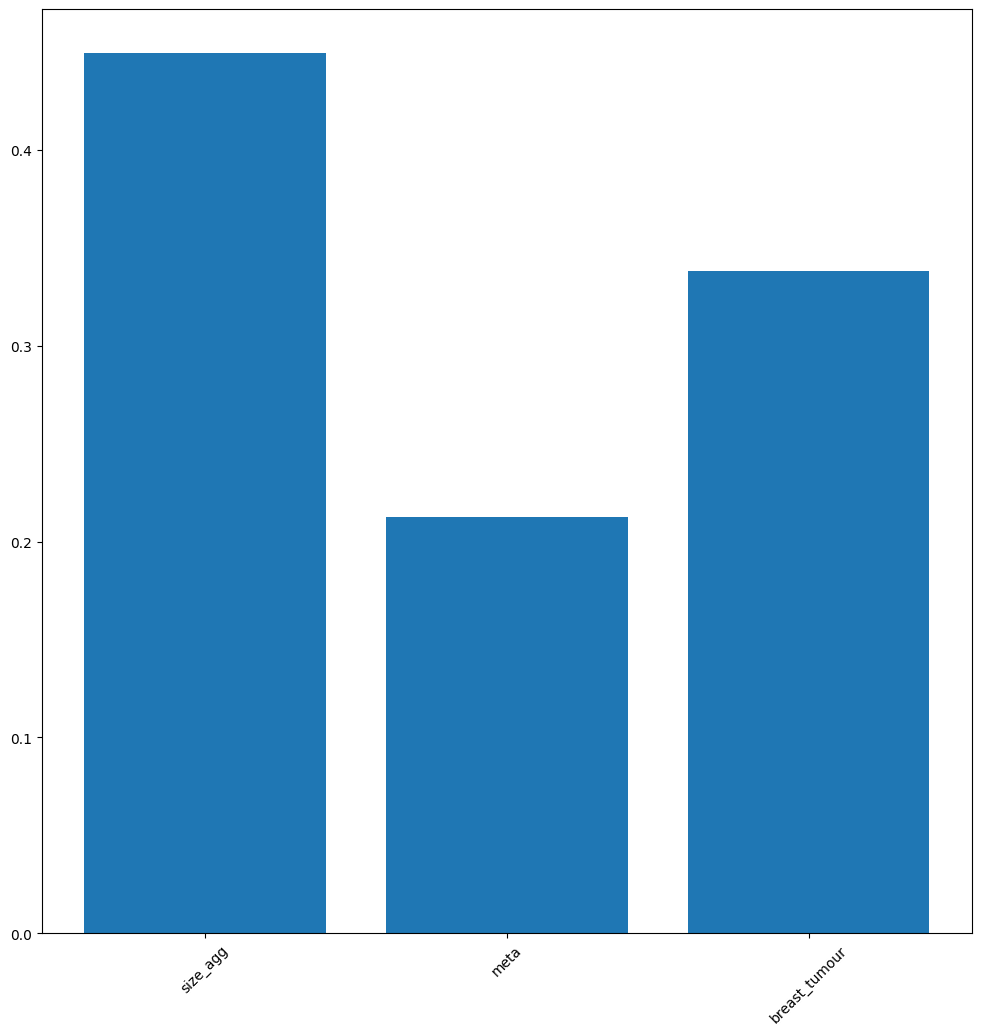

In [729]:
clf = RandomForestClassifier()
clf.fit(X_train,y_train)

plt.figure(figsize=(12,12))
plt.bar(X_train.columns, clf.feature_importances_)
plt.xticks(rotation=45)

##### Learning Cruve

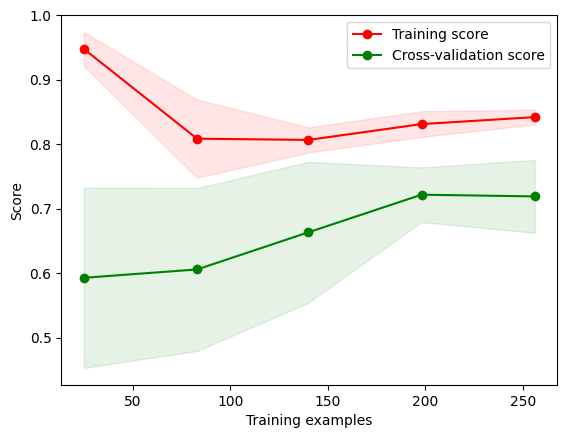

In [730]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(model, X_resampled, y_resampled, cv=5, scoring='f1_macro')

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, valid_scores_mean, 'o-', color="g",
         label="Cross-validation score")

plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()

The high initial training score **(0.95)** and low initial cross-validation score **(0.48)** indicate that the model is overfitting the data when there are only a few training examples. This means that the model is very closely fitting the training data, but its high complexity is not generalizing well to new data, as seen in the low cross-validation score.

As the number of training examples increases, the training score decreases to **0.8**, which means that the model is starting to fit the data less closely and is becoming less complex. At the same time, the cross-validation score increases to **0.72**, indicating that the model is becoming more capable of generalizing to new data.

The gap between the training score and cross-validation score narrowing as the number of training examples increases is a good sign, as it means the model is improving in its ability to generalize to new data. The final training score **(0.85)** and cross-validation score **(0.72)** are still not ideal, as the gap between them is still quite high, but the improvement from the initial scores suggests that the model is becoming more stable and reliable.

In conclusion, your learning curve suggests that the model may benefit from having more training data to further reduce overfitting and improve its ability to generalize to new data. Additionally, it may also be helpful to try different model architectures or hyperparameters to see if the gap between the training and cross-validation scores can be reduced further.

When a model is too complex, it means that it has learned the training data too well, including all the noise and random fluctuations in the data. As a result, the model may not perform well on new, unseen data, and will have a low cross-validation score. This phenomenon is known as overfitting, where the model fits the training data so well that it becomes difficult for the model to generalize to new data. To improve the generalization ability of the model, one can reduce the complexity of the model by using regularization techniques like L1, L2 or Dropout, or pruning the model by limiting the maximum depth of the tree, for example. Additionally, data augmentation can help increase the size of the training set and improve the model's ability to generalize to new data.

##### Precision-Recall Curves

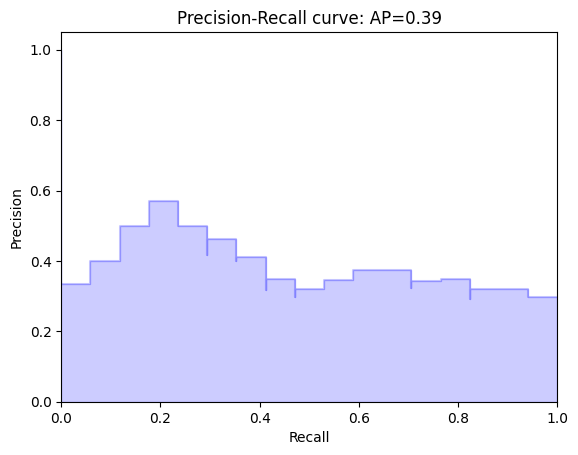

In [731]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

precision, recall, _ = precision_recall_curve(y_test, y_score)
average_precision = average_precision_score(y_test, y_score)

# plot the precision-recall curve
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
plt.show()

##### ROC-curve

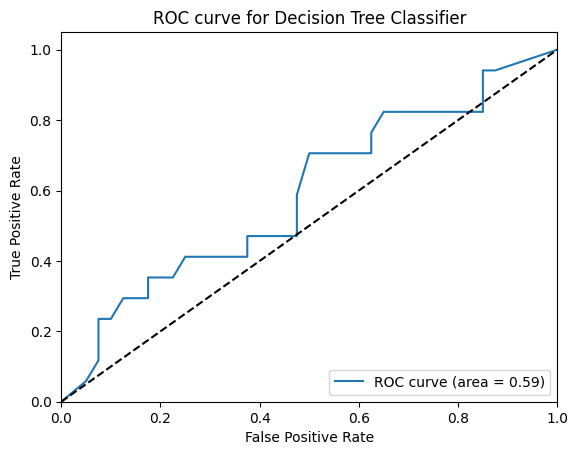

In [732]:

from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Decision Tree Classifier')
plt.legend(loc="lower right")
plt.show()


A ROC (Receiver Operating Characteristic) curve is a graphical representation of the performance of a classifier system. The ROC curve plots the true positive rate against the false positive rate at various thresholds.

The X-axis represents the False Positive Rate (FPR), which is defined as the number of false positive predictions divided by the total number of negative examples. The Y-axis represents the True Positive Rate (TPR), also known as sensitivity, recall or hit rate, which is defined as the number of true positive predictions divided by the total number of positive examples.

The ideal ROC curve is a perfect classifier that has a TPR of 1 and a FPR of 0, and it is located in the upper left corner of the plot. A classifier with random guessing will have a ROC curve that follows a diagonal line from the lower left to the upper right of the plot, and its AUC (Area Under the Curve) will be close to 0.5.

The closer the ROC curve is to the upper left corner, the better the classifier is at distinguishing between positive and negative examples. The AUC (Area Under the Curve) can be used as a summary metric of the classifier performance, and the higher the AUC, the better the classifier is.

To improve precision and recall, you can use the ROC curve to find the optimal threshold that balances precision and recall. You can adjust the threshold to make the classifier more or less conservative in its predictions, which will change the trade-off between precision and recall.

For example, if you want to increase precision, you can set a higher threshold, so that only predictions with a high probability of being positive are considered as positive. This will result in fewer false positive predictions but also fewer true positive predictions, leading to a decrease in recall.

On the other hand, if you want to increase recall, you can set a lower threshold, so that even predictions with a low probability of being positive are considered as positive. This will result in more true positive predictions but also more false positive predictions, leading to a decrease in precision.

By visualizing the ROC curve and its AUC, you can see how the classifier performs at different thresholds and make an informed decision on the threshold that is best for your specific use case.

##### Partial Dependence Plots (PDPs)

Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead


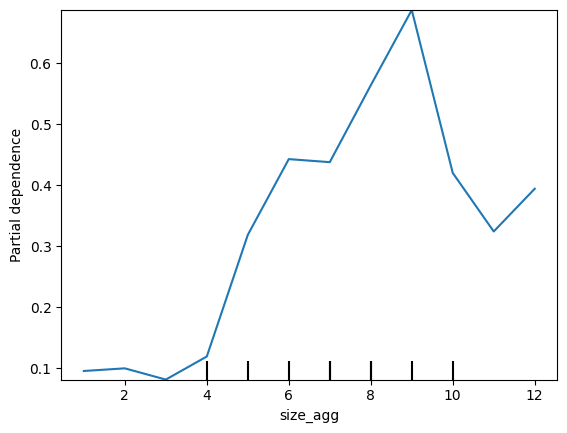

In [733]:
from sklearn.inspection import plot_partial_dependence
features = [0]
plot_partial_dependence(model, X_resampled, features, feature_names=X_resampled.columns)

Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead


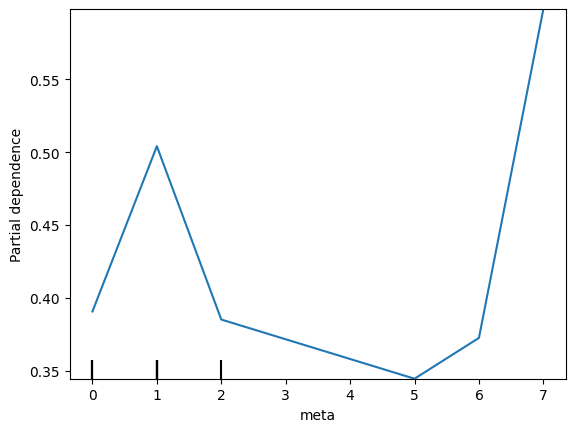

In [734]:
features = [1]
plot_partial_dependence(model, X_resampled, features, feature_names=X_resampled.columns)

Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead


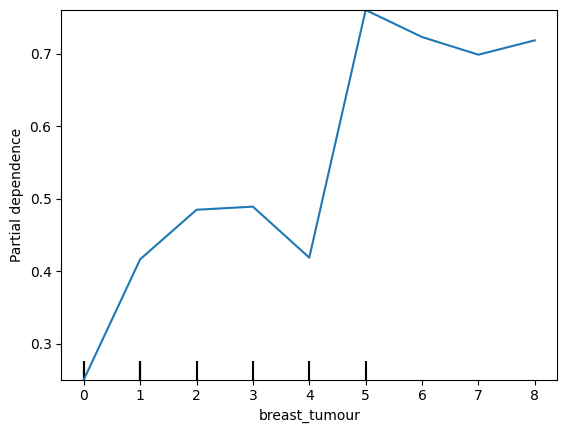

In [735]:

features = [2]
plot_partial_dependence(model, X_resampled, features, feature_names=X_resampled.columns)


In [736]:
"""
features = [3]
plot_partial_dependence(model, X_resampled, features, feature_names=X_resampled.columns)
"""

'\nfeatures = [3]\nplot_partial_dependence(model, X_resampled, features, feature_names=X_resampled.columns)\n'

Partial dependence plots (PDPs): PDPs show the relationship between a feature and the target variable, so you can see how changes in a feature affect the model's predictions. The x-axis of the plot represents the values of a single feature, while the y-axis represents the predicted target variable. The plot shows how the prediction changes as the feature value changes. If the relationship between the feature and the target is strong, you should see a clear pattern in the plot.

##### Permutation Importance

In [737]:
from sklearn.inspection import permutation_importance

result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=0)
importance_scores = result.importances_mean
sorted_idx = importance_scores.argsort()
for i in sorted_idx:
    print(f"{X_test.columns[i]}: {importance_scores[i]}")

breast_tumour: 0.0403508771929825
meta: 0.056140350877193004
size_agg: 0.06842105263157898


Permutation importance is a method for feature importance analysis that measures the impact of permuting the values of a feature on the performance of a machine learning model. The idea behind permutation importance is that if a feature is important, then randomly permuting its values should have a significant impact on the performance of the model.

The results of the permutation importance calculation are a set of importance scores, one for each feature in your data. The importance score for a feature is a float that measures the impact of permuting the values of that feature on the performance of your model.

Interpreting the importance scores can be done by comparing the scores for different features. A high importance score for a feature indicates that permuting its values has a significant impact on the performance of the model, meaning that the feature is important for making predictions. On the other hand, a low importance score for a feature indicates that permuting its values has little impact on the performance of the model, meaning that the feature is less important for making predictions.

It's important to keep in mind that the magnitude of the importance score is relative to the other scores, so it's best to compare the scores for different features rather than trying to interpret the scores in absolute terms.

It's also important to keep in mind that the permutation importance scores are only one tool for understanding the relationship between features and the target variable, and they may not always provide a complete picture of the relationship. In some cases, it may be necessary to use other techniques, such as partial dependence plots or Shapley values, to gain a full understanding of the relationship between features and the target variable.



#### SHAP (SHapley Additive exPlanations)

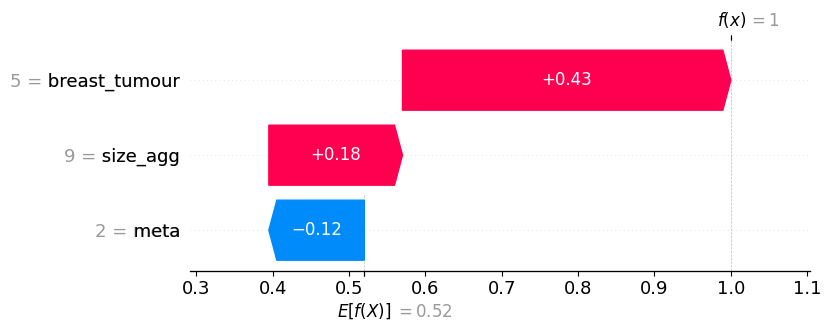

In [738]:
import shap

explainer = shap.Explainer(model.predict, X_resampled)
shap_values = explainer(X_test)

# Plot the SHAP values for a single prediction
shap.plots.waterfall(shap_values[0])

SHAP generates explanations for the output of machine learning models by attributing the contribution of each feature to the prediction. The output of SHAP is a vector of values for each feature, with positive values indicating that the feature has a positive impact on the prediction, and negative values indicating that the feature has a negative impact. You can interpret SHAP by looking at the overall distribution of values, as well as the values for individual features.

The SHAP waterfall plot is a graphical representation of the contributions of each feature to a specific prediction made by a machine learning model. The plot shows how each feature contributes to the prediction, both positively and negatively, and the total effect of all the features.

To interpret the SHAP waterfall plot, you should consider the following:

The height of each bar: The height of each bar represents the contribution of a feature to the prediction. A positive height means that the feature has a positive effect on the prediction, while a negative height means that the feature has a negative effect on the prediction.

The color of each bar: The color of each bar indicates the magnitude of the contribution of a feature to the prediction. A darker color indicates a higher magnitude, while a lighter color indicates a lower magnitude.

The total height of all the bars: The total height of all the bars represents the final prediction made by the model. The height of each bar should add up to the total height, indicating that the prediction is the result of the combined effects of all the features.

The baseline: The baseline is the value that the prediction would have if all features had a contribution of zero. The baseline is usually represented as a horizontal line in the plot.

By considering the height, color, and total height of each bar, and the baseline, you can gain insights into how each feature contributes to the prediction and the overall effect of all the features on the prediction. This information can help you make informed decisions about how to improve the performance of the model.